In [60]:
%matplotlib inline 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
import datetime
from sklearn import linear_model as lm
import sklearn
from scipy.stats import linregress
from scipy import interpolate
import csv


In [41]:
ef = pd.read_csv('EF100_4.csv', delimiter=',', header=0)

# , usecols = ['adjusted_peak', 'duration_sec', 'dist_ef', 
#                                                                     'temporal_sep_ef', 'maxmagfieldstrength',
#                                                                     'ef_sumnegsignedflux', 'ef_sumpossignedflux',
#                                                                    'ef_negpeakfluxonsetrate', 
#                                                                     'ef_pospeakfluxonsetrate']

# efY = np.log10(ef['adjusted_peak'])
j=0
# ef['adjusted_peak'] = map(int, ef['adjusted_peak'])
# ef = ef.ix[ef['adjusted_peak']==0]
# print ef.shape[0]
# print ef

# print type(ef['adjusted_peak'].values[794])
for elem in ef['adjusted_peak']:
    if elem==0:
        ef['adjusted_peak'].values[j] = ef['fl_peakflux_goes'].values[j]
    j+=1
print ef['adjusted_peak'].values[794]
print type(ef['adjusted_peak'].values[794])
# ef.ix[:, 'sum_abs_signedflux'] = abs(ef['ef_sumnegsignedflux']) + ef['ef_sumpossignedflux']
# ef.ix[:, 'sum_abs_peakonsetrate'] = abs(ef['ef_negpeakfluxonsetrate']) + ef['ef_pospeakfluxonsetrate']
# efX = ef[['duration_sec', 'dist_ef','temporal_sep_ef', 'maxmagfieldstrength','sum_abs_signedflux', 
#              'sum_abs_peakonsetrate']]
#398% off
# efX = ef[['dist_ef','temporal_sep_ef', 'maxmagfieldstrength','sum_abs_signedflux', 
#              'sum_abs_peakonsetrate']]
ef.to_csv('EF100_4.csv',index=False)

41000
<type 'numpy.int64'>


In [9]:
ef = pd.read_csv('EF_7_times2.csv', delimiter=',', header=0)
ef = ef.ix[ef['is_ar']==0]

In [ ]:
efY = np.log(ef['adjusted_peak2'])
efX = ef[['dist_ef','temporal_sep_ef', 'maxmagfieldstrength','ef_sumnegsignedflux', 'ef_sumpossignedflux', 
          'ef_negpeakfluxonsetrate', 'ef_pospeakfluxonsetrate']]

In [14]:
# efX = ef[['duration_sec', 'dist_ef','temporal_sep_ef', 'maxmagfieldstrength','sum_abs_signedflux', 
#              'sum_abs_peakonsetrate']]
efX = ef[['temporal_sep_ef', 'maxmagfieldstrength','ef_sumnegsignedflux', 'ef_sumpossignedflux', 
          'ef_negpeakfluxonsetrate', 'ef_pospeakfluxonsetrate']]

In [15]:
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(
    efX, efY, test_size=0.2, random_state = 5)

In [55]:
# lm.TheilSenRegressor(fit_intercept=True, copy_X=True, max_subpopulation=10000.0, n_subsamples=None, max_iter=300, 
#                      tol=0.001, random_state=None, n_jobs=1, verbose=False)

In [16]:
tsr = lm.TheilSenRegressor(n_subsamples=600, verbose=True)

In [42]:
print ef['adjusted_peak']

0       970719
1       122489
2       106749
3        93109
4       164719
5       223219
6        76058
7        78156
8      1088800
9       168919
10       68188
11      929789
12      101240
13       87337
14      145310
15       71073
16      153969
17      110689
18      107539
19       99404
20     1027899
21      104909
22       67139
23      318449
24       60843
25       93109
26      123799
27       72122
28      105180
29       57170
        ...   
784      14411
785      41955
786     186759
787     138489
788      70548
789      50087
790      78156
791      79992
792     205910
793      47727
794      41000
795      81000
796      42000
797      83000
798      90000
799      73000
800      96999
801     110000
802      64777
803      27003
804      78418
805     108849
806      23593
807      25167
808      19658
809     157639
810      29625
811     114880
812      41430
813      41955
Name: adjusted_peak, dtype: int64


In [72]:
fit = tsr.fit(xtrain,ytrain)
params = tsr.get_params()
predicted = tsr.predict(xtest)
r2 = tsr.score(xtest,ytest)

In [73]:
print fit
print params
#print predicted
print abs((predicted-ytest)/ytest).mean()
print abs((predicted-ytest)/ytest).var()
print r2

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=188,
         random_state=None, tol=0.001, verbose=False)
{'n_jobs': 1, 'tol': 0.001, 'fit_intercept': True, 'max_iter': 300, 'random_state': None, 'n_subsamples': 188, 'copy_X': True, 'max_subpopulation': 10000, 'verbose': False}
0.0589173238342
0.00228331718748
0.100756136457


In [10]:
ef = pd.read_csv('EF_7_times2.csv', delimiter=',', header=0)
ef = ef.ix[ef['is_ar']==0]
efY = np.log10(ef['adjusted_peak'])
ef.ix[:, 'sum_abs_signedflux'] = abs(ef['ef_sumnegsignedflux']) + ef['ef_sumpossignedflux']
ef.ix[:, 'sum_abs_peakonsetrate'] = abs(ef['ef_negpeakfluxonsetrate']) + ef['ef_pospeakfluxonsetrate']

In [11]:
efX = ef[['temporal_sep_ef', 'maxmagfieldstrength', 'ef_axislength', 'sum_abs_signedflux','sum_abs_peakonsetrate']]

In [26]:
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(
    efX, efY, test_size=0.1, random_state = 5)

In [27]:
tsr = lm.TheilSenRegressor(verbose=True)

In [28]:
fit = tsr.fit(xtrain,ytrain)
params = tsr.get_params()
predicted = tsr.predict(xtest)
r2 = tsr.score(xtest,ytest)

Breakdown point: 0.106760052635
Number of samples: 233
Tolerable outliers: 24
Number of subpopulations: 10000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [29]:
print fit
print params
#print predicted
print abs((predicted-ytest)/ytest).mean()
print abs((predicted-ytest)/ytest).var()
print r2
# for i, elem in enumerate(predicted):
#     print elem, ytest.values[i]
    

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=True)
{'n_jobs': 1, 'tol': 0.001, 'fit_intercept': True, 'max_iter': 300, 'random_state': None, 'n_subsamples': None, 'copy_X': True, 'max_subpopulation': 10000, 'verbose': True}
0.0613604727114
0.00347247329095
0.141420978361


In [30]:
tsr.coef_ 

array([ -2.79350912e-06,   3.05134812e-04,   3.95381859e-02,
         1.82486353e-05,   3.39471994e-06])

In [139]:
efX = ef[['dist_ef','temporal_sep_ef', 'maxmagfieldstrength', 'ef_association_strength']]

In [142]:
efX = ef[['dist_ef','temporal_sep_ef', 'maxmagfieldstrength']]

In [147]:
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(
    efX, efY, test_size=0.2, random_state = 1)

In [144]:
tsr = lm.TheilSenRegressor(n_subsamples=600, verbose=True)

In [141]:
assoc_strength = xtest['ef_association_strength']
assoc_strength = assoc_strength/assoc_strength.max() 

In [150]:
fit = tsr.fit(xtrain,ytrain)
params = tsr.get_params()
predicted = tsr.predict(xtest)
r2 = tsr.score(xtest,ytest)

Breakdown point: 9.22243773003e-05
Number of samples: 651
Tolerable outliers: 0
Number of subpopulations: 10000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


In [151]:
print fit
print params
#print predicted
print abs((predicted-ytest)/ytest).mean()
print abs((predicted-ytest)/ytest).var()
print r2

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=600,
         random_state=None, tol=0.001, verbose=True)
{'n_jobs': 1, 'tol': 0.001, 'fit_intercept': True, 'max_iter': 300, 'random_state': None, 'n_subsamples': 600, 'copy_X': True, 'max_subpopulation': 10000, 'verbose': True}
0.057864724804
0.00160987552851
0.121662514476


In [43]:
efcols = ['adjusted_peak', 'duration_sec', 'dist_ef', 'temporal_sep_ef', 'maxmagfieldstrength',
          'ef_sumnegsignedflux', 'ef_sumpossignedflux','ef_negpeakfluxonsetrate', 
          'ef_pospeakfluxonsetrate', 'ef_association_strength', 'sum_abs_signedflux', 'sum_abs_peakonsetrate']
ef = pd.read_csv('EF100_4.csv', delimiter=',', header=0, usecols = efcols)
efY = np.log10(ef['adjusted_peak'])
efX = ef[['dist_ef','temporal_sep_ef', 'maxmagfieldstrength']]

In [81]:
rangepct = np.linspace(0.0982800983,.5,328)
print rangepct[-1]
print rangepct[-2]*814
print rangepct[-30]*814

0.5
406.0
378.000000001


In [82]:
bestpctr2_std = 0.1
bestpcterror_std = 0.053
bestpctvar_std = 0.005
bestpctr2 = 0.1
bestpcterror = 0.053
bestpctvar = 0.005
bestpctr2_pct = 0
bestpcterror_pct = 0
bestpctvar_pct = 0
bestpctr2_n = 0
bestpcterror_n = 0
bestpctvar_n = 0
bestpctr2_pcts = []
bestpcterror_pcts = []
bestpctvar_pcts = []
bestpctr2_ns = []
bestpcterror_ns = []
bestpctvar_ns = []
rangepct = np.linspace(0.0982800983,.5,328)
otherpct = 1-rangepct
j=0
for i, pct in enumerate(rangepct):  
    print '------'
    print i, pct
    xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(
        efX, efY, test_size=pct, random_state = 5)
    for n in range(int(otherpct[j]*651),int(otherpct[j]*814)):
        if n%10==0: print n
        tsr = lm.TheilSenRegressor(n_subsamples=n)
        fit = tsr.fit(xtrain,ytrain)
        params = tsr.get_params()
        predicted = tsr.predict(xtest)
        r2 = tsr.score(xtest,ytest)
        avgpcterror = (abs((predicted-ytest))/ytest).mean()
        avgpctvar = ((predicted-ytest)/ytest).var()
        print r2, avgpcterror, avgpctvar
        if r2 > bestpctr2_std:
            print 'found good r2'
            bestpcterror_pcts.append(pct) 
            bestpctr2_ns.append(n)
            if r2 > bestpcterror_pct:
                bestpcterror_pct = pct
                bestpctr2_n = n
        if avgpcterror < bestpcterror_std:
            print 'found good percent error'
            bestpcterror_pcts.append(pct) 
            bestpcterror_ns.append(n)
            if avgpcterror < bestpcterror_pct:
                bestpcterror_pct = pct
                bestpcterror_n = n
        if avgpctvar < bestpctvar_std:
            print 'found good var'
            bestpctvar_pcts.append(pct) 
            bestpctvar_ns.append(n)
            if avgpctvar < bestpctvar_pct:
                bestpctvar_pct = pct
                bestpctvar_n = n
    j+=1
                

------
0 0.0982800983
0.00983958264243 0.0628725497572 0.00601252752248
0.00993746587104 0.0628648099671 0.00601247103045
0.010331216596 0.0628477474822 0.00601255921751
590
0.00954059891051 0.0628872726335 0.00601313824827
0.0103407860166 0.0628388262317 0.00601129929655
0.00986143297111 0.0628670857957 0.00601244711481
0.00992428673803 0.0628664993367 0.00601223339705
0.0104835860543 0.0628311572171 0.00601091256058
0.010512241969 0.0628343150748 0.00601074843629
0.0101751351145 0.0628544807747 0.00601170518507
0.00962759945633 0.0628820378471 0.00601314222553
0.00910415763162 0.0629137848661 0.0060144205991
0.0105098897032 0.0628308582366 0.00601138472901
600
0.00994667909302 0.0628639568709 0.00601264378924
0.0100447107259 0.0628574491485 0.0060122427155
0.00985921509112 0.0628758519937 0.00601253735503
0.0103564350416 0.0628410162019 0.00601114819168
0.0094207867313 0.0629002809774 0.00601390404814
0.00980121425891 0.0628770792221 0.00601279052733
0.0104785020431 0.0628367787065 0

KeyboardInterrupt: 

In [83]:
print bestpctr2_pcts
print bestpcterror_pcts 
print bestpctvar_pcts
print bestpctr2_ns
print bestpcterror_ns
print bestpctvar_ns

[]
[]
[]
[]
[]
[]


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


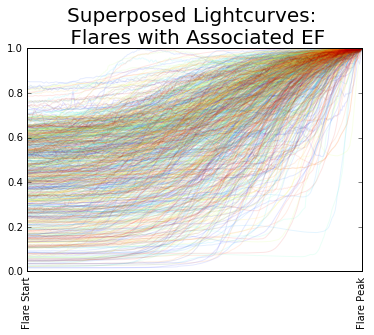

In [34]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dateparseT = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')
ef = pd.read_csv('EF100_4_superpose.csv', delimiter=',', header=0, parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
ef = ef.ix[ef['duration_sec']>=179.9]
n = ef.shape[0]

colormap = plt.cm.jet
plt.suptitle('Superposed Lightcurves', fontsize = 20)
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
plt.ylabel(r'Flux [$W/m^2$]', size = 'large')
plt.xticks([0, 1], ('Flare Start', 'Flare Peak'), rotation = 90)
transparency = np.linspace(0.4, 0.9, n)
j = 0
i=-1

plt.subplot(221)
plt.subtitle('Flares Associated with EF')
for sol in ef['SOL_standard']:
    fname = 'sklearn_goes_all_lc/'+sol+'.csv'
    lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],date_parser=dateparse)
    lc = lc.ix[lc['date']<=ef['adjusted_peaktime'].values[j]]
    lc['xrsb'] = lc['xrsb']*10**11
    length = lc.shape[0]
    indices = np.linspace(0, length, length)
    pctEvent = indices/length
    pctPeak = lc['xrsb']/lc['xrsb'].values[-1]
    plt.plot(pctEvent, pctPeak, alpha=0.1)
    j+=1
    i-=1

    

In [23]:
events = pd.read_csv('noEF75_4.csv', delimiter=',', header=0)
#events = events.ix[events['duration_sec']>=60]


In [24]:
percentile = [1, 5, 10, 25, 33, 50, 55, 60, 66, 75, 90]
np.percentile(events['duration_sec'], percentile)

array([   0. ,  183. ,  207. ,  251. ,  273. ,  335. ,  355. ,  377. ,
        410. ,  463. ,  636.7])

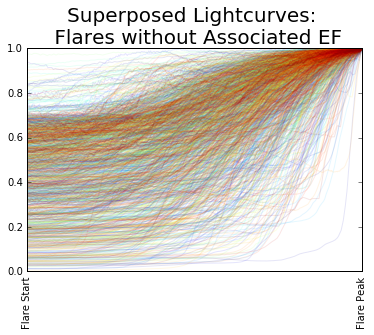

In [34]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dateparseT = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')
noef = pd.read_csv('noEF75_4_superpose.csv', delimiter=',', header=0, parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
noef = noef.ix[noef['duration_sec']>=183]
n = noef.shape[0]

colormap = plt.cm.jet
plt.title('Superposed Lightcurves: \n Flares without Associated EF', fontsize = 20)
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
yLabel = r'Flux [$W/m^2$]'
plt.xticks([0, 1], ('Flare Start', 'Flare Peak'), rotation = 90)
transparency = np.linspace(0.4, 0.9, n)
j = 0
i=-1


for sol in noef['SOL_standard']:
    fname = 'sklearn_goes_all_lc/'+sol+'.csv'
    lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],date_parser=dateparse)
    lc = lc.ix[lc['date']<=noef['adjusted_peaktime'].values[j]]
    lc['xrsb'] = lc['xrsb']*10**11
    length = lc.shape[0]
    indices = np.linspace(0, length, length)
    pctEvent = indices/length
    pctPeak = lc['xrsb']/lc['xrsb'].values[-1]
    plt.plot(pctEvent, pctPeak, alpha=0.1)
    j+=1
    i-=1


57
84
0.263157894737
0.178571428571


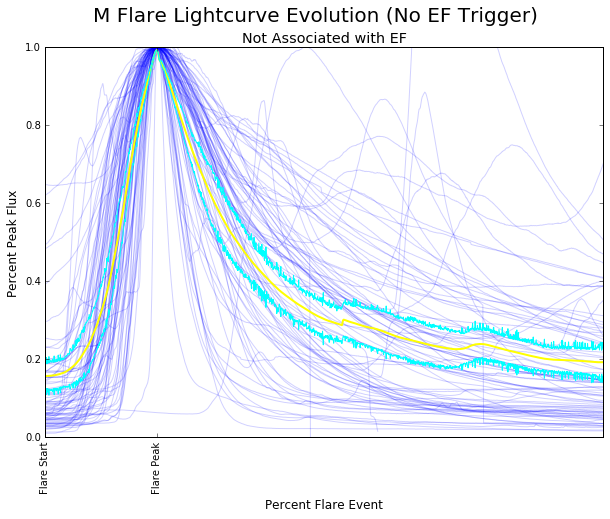

In [386]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dateparseT = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

ef = pd.read_csv('EF100_4_superpose.csv', delimiter=',', header=0, 
                 parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
ef = ef.ix[ef['duration_sec']>=60]
goesclass = map(str, ef['fl_goescls'])
goesclass = map(lambda x: x[0:1], goesclass)
ef.loc[:, 'goesclass'] = goesclass
ef = ef.ix[ef['goesclass']=='M']
n1 = ef.shape[0]
print n1

noef = pd.read_csv('noEF75_4_superpose.csv', delimiter=',', header=0, 
                   parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
noef = noef.ix[noef['duration_sec']>=60]
goesclass1 = map(str, noef['fl_goescls'])
goesclass1 = map(lambda x: x[0:1], goesclass1)
noef.loc[:, 'goesclass'] = goesclass1
noef = noef.ix[noef['goesclass']=='M']
n2 = noef.shape[0]
print n2
alpha1 = 15./n1
alpha2 = 15./n2
print alpha1
print alpha2
length1 =[]
length2 = []


plt.figure(figsize=(10,7))
# f.subplots_adjust(top=0.94)
# f, axes = (plt.subplots(1, 2, sharey = 'row', figsize = (20,19)))
plt.suptitle('M Flare Lightcurve Evolution (No EF Trigger)', fontsize = 20)

# colormap = plt.cm.gray
# plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n2)])

#transparency = np.linspace(0.4, 0.9, n1)
j = 0
i=-1

# plt.subplot(221)

plt.ylim(0,1)
plt.title('Not Associated with EF', size='x-large')
plt.xticks([0, 0.2], ('Flare Start', 'Flare Peak'), rotation = 90)
plt.xlabel('Percent Flare Event', size = 'large')
plt.ylabel('Percent Peak Flux', size = 'large')
j=0    
for sol in noef['SOL_standard']:
    fname = 'goes_event_lcs/'+sol+'.csv'
    lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],
                     date_parser=dateparse)
    end = np.timedelta64(noef['duration_sec'].values[j]*4, 's') + noef['adjusted_peaktime'].values[j]
    lc = lc.ix[lc['date']<=end]
    lc['xrsb'] = lc['xrsb']*10**11
    length = lc.shape[0]
    length1.append(length)
    indices = np.linspace(0, length, length)
    pctEvent = indices/length
    pctPeak = lc['xrsb']/noef['adjusted_peak'].values[j]
    plt.plot(pctEvent, pctPeak, alpha=alpha2, color='blue', label = 'Not associated with EF')
    j+=1


# # plt.subplot(222)    
# j=0   
# plt.ylim(0,1)
# # plt.title('Associated with EF', size ='x-large')
# plt.xlabel('Percent Flare Event', size = 'large')
# plt.ylabel('Percent Peak Flux', size = 'large')
# plt.xticks([0, 0.2], ('Flare Start', 'Flare Peak'), rotation = 90)
# for sol in ef['SOL_standard']:
#     fname = 'goes_event_lcs/'+sol+'.csv'
#     lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],
#                      date_parser=dateparse)
#     end = np.timedelta64(ef['duration_sec'].values[j]*4, 's') + ef['adjusted_peaktime'].values[j]
#     lc = lc.ix[lc['date']<=end]
#     lc['xrsb'] = lc['xrsb']*10**11
#     length = lc.shape[0]
#     length2.append(length)
#     indices = np.linspace(0, length, length)
#     pctEvent = indices/length
#     pctPeak = lc['xrsb']/ef['adjusted_peak'].values[j]
#     plt.plot(pctEvent, pctPeak, alpha=alpha1, color='red')
#     j+=1
plt.plot(standardpct, avgs, color='yellow', lw=2)
plt.plot(standardpct, error_plus, color='cyan')
plt.plot(standardpct, error_minus, color='cyan')
# plt.legend(bbox_to_anchor=(1.05, .65), loc=2, borderaxespad=0.)
fNameSave = 'superposed_lightcurves1_M_SEA.png' 
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)


In [ ]:
composite = []
f = interpolate.interp1d(pctX, pctPeak)
standardpct = np.linspace(0, 1, 1500)
standardLC = f(standardpct)
composite.append(standardLC)

In [203]:
print np.array(length1).mean()
print np.array(length2).mean()
print np.array(length1).var()
print np.array(length2).var()

percentile = [1, 5, 10, 25, 33, 50, 55, 60, 66, 75, 90, 95, 99, 99.9]
print np.percentile(length1, percentile)
print np.percentile(length2, percentile)

2907.27866972
2798.03625954
1734519.94872
1463670.84792
[ 1142.42   1473.     1612.     1972.5    2162.43   2589.     2739.4    2933.
  3112.02   3510.75   4672.3    5417.25   7681.51   8978.754]
[ 1172.     1438.75   1582.     1975.5    2139.     2527.     2652.     2777.
  2967.36   3323.5    4475.     5174.2    6696.91   8061.236]


In [150]:
from scipy.stats import kruskal, ks_2samp

ef = pd.read_csv('standardized_lc_5_M_ef.csv', delimiter=',', header=0)
noef = pd.read_csv('standardized_lc_5_M_noef.csv', delimiter=',', header=0)
standardpct = ef.axes[1]

pvals = []
promising = []
pp =[]
pvalsk = []
promisingk = []
ppk =[]
ef.loc[:, 'pvalue'] = [0 for i in range(ef.shape[0])]
noef.loc[:, 'pvalue'] = [0 for i in range(noef.shape[0])]
# for pct in standardpct:
#     metrics = kruskal(ef[pct], noef[pct])
#     p = metrics[1]
#     pvals.append(p)
#     if p <= 0.1:
#         promising.append(p)
#         pp.append(pct)
# plt.hist(pvals, range=(0,1))    
j=0
for pct in standardpct:
    metrics = ks_2samp(ef[pct], noef[pct])
    ef['pvalue'].values[j] = metrics[1]
    noef['pvalue'].values[j] = metrics[1]
    pvalsk.append(p)
    if p <= 0.1:
        promisingk.append(p)
        ppk.append(pct)
    j+=1
plt.hist(pvalsk, range=(0,1), alpha=0.5)
print promisingk
print ppk

IndexError: index 55 is out of bounds for axis 0 with size 55

[]


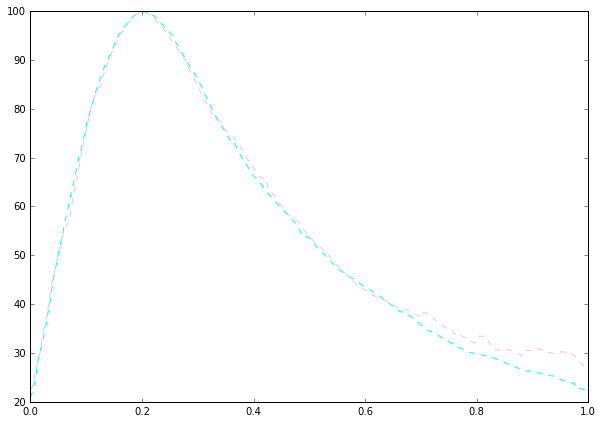

In [148]:
ef = pd.read_csv('standardized_lc_5_M_ef.csv', delimiter=',', header=0)
noef = pd.read_csv('standardized_lc_5_M_noef.csv', delimiter=',', header=0)
standardpct = ef.axes[1]
distinctef = []
distinctnoef = []
distinct_pct = []
otheref = []
othernoef = []
other_pct = []
for i, pct in enumerate(standardpct):
    if float(pct) in promising:
        distinctef.append(ef[pct].median())
        distinctnoef.append(noef[pct].median())
        distinct_pct.append(float(pct))
    else:
        otheref.append(ef[pct].median())
        othernoef.append(noef[pct].median())
        other_pct.append(float(pct))
print distinct_pct
plt.figure(figsize=(10,7))        
plt.plot(other_pct, otheref, c='pink', ls='--')
plt.plot(other_pct, othernoef, c='cyan', ls='--')
plt.scatter(distinct_pct, distinctnoef, c='r', s=10)
plt.scatter(distinct_pct, distinctef, c='b', s=10)
# plt.xlim(0, 1)
# plt.ylim(0, 1)

In [382]:
def sea(gclass, numevents, pctmultiplier, iteration):   
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    dateparseT = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

    full = pd.read_csv('full_dataset4_EF_friendly_superpose.csv', delimiter=',', header=0, 
                     parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
    full = full.ix[full['duration_sec']>=60]
    goesclass = map(str, full['fl_goescls'])
    goesclass = map(lambda x: x[0:1], goesclass)
    full.loc[:, 'goesclass'] = goesclass
    full = full.ix[full['goesclass']==gclass]


    ef = pd.read_csv('EF100_4_superpose.csv', delimiter=',', header=0, 
                     parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
    ef = ef.ix[ef['duration_sec']>=60]
    goesclass = map(str, ef['fl_goescls'])
    goesclass = map(lambda x: x[0:1], goesclass)
    ef.loc[:, 'goesclass'] = goesclass
    ef = ef.ix[ef['goesclass']==gclass]


    noef = pd.read_csv('noEF75_4_superpose.csv', delimiter=',', header=0, 
                       parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
    noef = noef.ix[noef['duration_sec']>=60]
    goesclass1 = map(str, noef['fl_goescls'])
    goesclass1 = map(lambda x: x[0:1], goesclass1)
    noef.loc[:, 'goesclass'] = goesclass1
    noef = noef.ix[noef['goesclass']==gclass]

    composite_full = []
    composite_ef = []
    composite_nonef = []
    
    standardpct = np.linspace(0, 1, numevents)

    j=0    
    fname1 = 'standardized_lc_'+str(pctmultiplier)+'_'+str(gclass)+'_full.csv'
    print fname1
    with open(fname1, 'wb') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(standardpct) 
        for sol in full['SOL_standard']:
            fname = 'goes_event_lcs/'+sol+'.csv'
            lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],
                             date_parser=dateparse)
            end = (np.timedelta64(int(full['duration_sec'].values[j]*(pctmultiplier-1)), 's') + 
                   full['adjusted_peaktime'].values[j])
            lc = lc.ix[lc['date']<=end]
            lc['xrsb'] = lc['xrsb']*10**11
            nannycheck = np.isnan(lc['xrsb'])
            nonans = True
            for elem in nannycheck:
                if nonans==True:
                    if elem==True:
                        nonans==False
            if nonans:
                length = lc.shape[0]
                indices = np.linspace(0, length, length)
                pctEvent = indices/length
                pctPeak = lc['xrsb']/full['adjusted_peak'].values[j]
                f = interpolate.interp1d(pctEvent, pctPeak)
                standardpct = np.linspace(0, 1, numevents)
                standardLC = f(standardpct)
                writer.writerow(standardLC)
            j+=1
    
    j=0    
    fname2 = 'standardized_lc_'+str(pctmultiplier)+'_'+str(gclass)+'_noef.csv'
    print fname2
    with open(fname2, 'wb') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(standardpct)                           
        for sol in noef['SOL_standard']:
            fname = 'goes_event_lcs/'+sol+'.csv'
            lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],date_parser=dateparse)
            end = (np.timedelta64(noef['duration_sec'].values[j]*(pctmultiplier-1), 's') + 
                   noef['adjusted_peaktime'].values[j])
            lc = lc.ix[lc['date']<=end]
            lc['xrsb'] = lc['xrsb']*10**11
            nannycheck = np.isnan(lc['xrsb'])
            nonans = True
#             if j==0: 
#                 for elem in nannycheck:
#                     print elem
            for i, elem in enumerate(nannycheck):
                if nonans:
                    if elem==True:
                        nonans=False
            if nonans:
                length = lc.shape[0]
                indices = np.linspace(0, length, length)
                pctEvent = indices/length
                pctPeak = lc['xrsb']/noef['adjusted_peak'].values[j]
                f = interpolate.interp1d(pctEvent, pctPeak)
                standardpct = np.linspace(0, 1, numevents)
                standardLC = f(standardpct)
                writer.writerow(standardLC)
            j+=1


    fname3 = 'standardized_lc_'+str(pctmultiplier)+'_'+str(gclass)+'_ef.csv'
    j=0   
    with open(fname3, 'wb') as csvfile:
        print fname3
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(standardpct)                       
        for sol in ef['SOL_standard']:
            fname = 'goes_event_lcs/'+sol+'.csv'
            lc = pd.read_csv(fname, delimiter = ',', header = 0, parse_dates=['date'],date_parser=dateparse)
            end = (np.timedelta64(ef['duration_sec'].values[j]*(pctmultiplier-1), 's') + 
                   ef['adjusted_peaktime'].values[j])
            lc = lc.ix[lc['date']<=end]
            lc['xrsb'] = lc['xrsb']*10**11
            nannycheck = np.isnan(lc['xrsb'])
            nonans = True
            for elem in nannycheck:
                if nonans==True:
                    if elem==True:
                        nonans=False
            if nonans:
                length = lc.shape[0]
                indices = np.linspace(0, length, length)
                pctEvent = indices/length
                pctPeak = lc['xrsb']/ef['adjusted_peak'].values[j]
                composite_ef.append(pctPeak)
                f = interpolate.interp1d(pctEvent, pctPeak)
                standardLC = f(standardpct)
                writer.writerow(standardLC)
            j+=1
        

In [383]:
sea('M', 1500, 5, 1)

standardized_lc_5_M_full.csv
standardized_lc_5_M_noef.csv
standardized_lc_5_M_ef.csv


In [ ]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample


In [361]:
def booty_error(inputfile, numresample):
    standardized_lc = pd.read_csv(inputfile, delimiter=',', header=0)
    pctevent = standardized_lc.axes[1]
    comp_errors = []
    for pct in pctevent:
#         print pct*1500 
        arr = []
        for j in range(numresample):
            boot = bootstrap_resample(standardized_lc[pct]) 
            arr.append(np.median(boot))
        xy = np.histogram(arr, bins=50)
        x = xy[1]
        x = x[0:-1]
        median = np.median(x)
        diffs = (x-median)**2
        summ = sum(diffs)
        summ = summ/(len(diffs)-1)
        final_err = np.sqrt(summ)
        comp_errors.append(final_err)
    return comp_errors

In [127]:
errors2 = booty_error('standardized_lc_5_M_full.csv', 1000)

NameError: name 'booty_error' is not defined

In [126]:
print len(errors2)

NameError: name 'errors2' is not defined

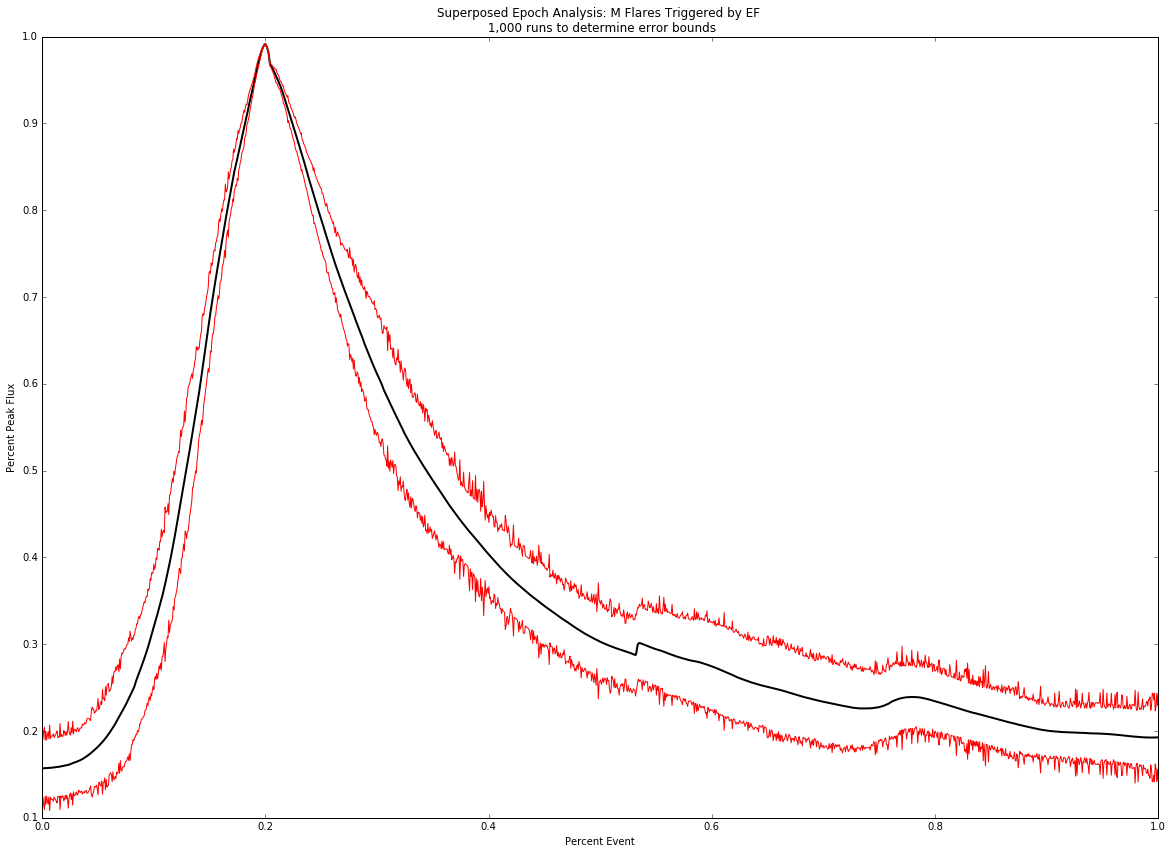

In [363]:
standardpct = np.linspace(0, 1, 1500) 
standardized_lc_noef = pd.read_csv('standardized_lc_5_M_ef.csv', delimiter=',', header=0)
pctevent = standardized_lc_noef.axes[1]
avgs = []
error_plus = []
error_minus = []
j=0
for pct in pctevent:
    avg = standardized_lc_noef[pct].mean()
    errplus = avg+errors2[j]
    errmin = avg-errors2[j]
    avgs.append(avg)
    error_plus.append(errplus)
    error_minus.append(errmin)
    j+=1
plt.figure(figsize=(20,14))    
plt.plot(standardpct, avgs, color='black', lw=2)
plt.plot(standardpct, error_plus, color='r')
plt.plot(standardpct, error_minus, color='r')
plt.title('Superposed Epoch Analysis: M Flares Triggered by EF \n 1,000 runs to determine error bounds')
plt.xlabel('Percent Event')
_=plt.ylabel('Percent Peak Flux')
dic = {'raw_variance': errors, 'average':avgs, 'avgplusvar': error_plus, 'avgminusvar':error_minus}
metadata = pd.DataFrame(dic)
metadata.to_csv('standardized_lc_5_M_full_metadata.csv', index_label=pctevent, index=False)
fNameSave = 'SEA_5_M_full.png' 
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)


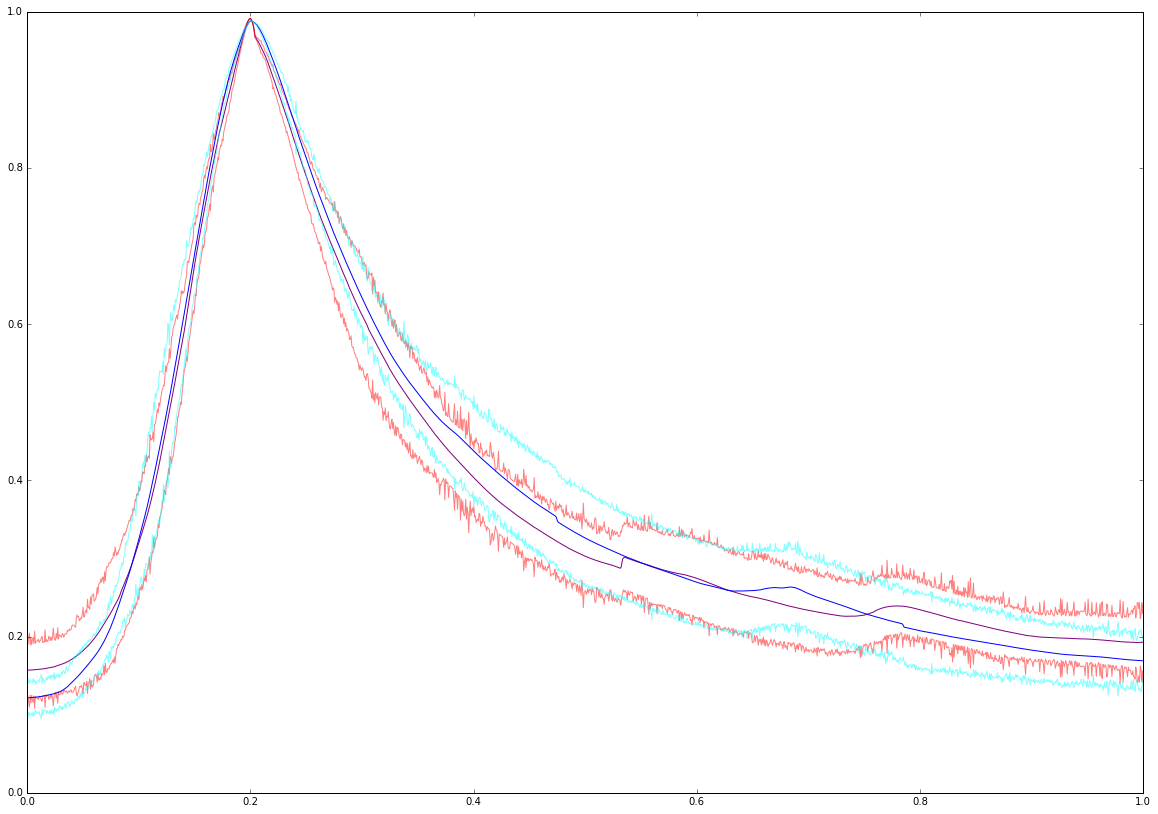

In [367]:
ef = pd.read_csv('standardized_lc_5_M_ef_metadata.csv', delimiter=',', header=0)
noef = pd.read_csv('standardized_lc_5_M_noef_metadata.csv', delimiter=',', header=0)
pctevent=standardpct = np.linspace(0, 1, 1500)
plt.figure(figsize=(20,14)) 
plt.plot(pctevent, ef['average'], color='purple')
plt.plot(pctevent, ef['avgplusvar'], color='r', alpha=0.5)
plt.plot(pctevent, ef['avgminusvar'], color='r', alpha=0.5)
plt.plot(pctevent, noef['average'], color='blue')
plt.plot(pctevent, noef['avgplusvar'], color='cyan', alpha=0.5)
plt.plot(pctevent, noef['avgminusvar'], color='cyan', alpha=0.5)

In [ ]:
error_ef = booty_error('standardized_lc_5_1_ef.csv', 10000)

In [249]:
pooponahorse = [0,1, 2,4,2,2,2,3,1,3,4,5,4]
np.histogram(pooponahorse)

(array([1, 0, 2, 0, 4, 0, 2, 0, 3, 1]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]))

In [ ]:
import sklearn.gaussian_process as gp

gp.regression_models()

In [198]:
ef = pd.read_csv('full_dataset4.csv', delimiter=',', header=0)
goesclass = map(str, ef['fl_goescls'])
goesclass = map(lambda x: x[0:1], goesclass)
ef.loc[:, 'goesclass'] = goesclass
ef = ef.ix[ef['goesclass']=='X']
n1 = ef.shape[0]
print n1


9


/usr/local/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [200]:
ef = pd.read_csv('prepped_GOES2.csv', delimiter=',', header=0)
goesclass = map(str, ef['fl_goescls'])
goesclass = map(lambda x: x[0:1], goesclass)
ef.loc[:, 'goesclass'] = goesclass
ef = ef.ix[ef['goesclass']=='X']
n1 = ef.shape[0]
print n1


14


In [201]:
ef = pd.read_csv('raw_GOES.csv', delimiter=',', header=0)

ef['dur']
goesclass = map(str, ef['fl_goescls'])
goesclass = map(lambda x: x[0:1], goesclass)
ef.loc[:, 'goesclass'] = goesclass
ef = ef.ix[ef['goesclass']=='X']
n1 = ef.shape[0]
print n1


36


/usr/local/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
ef = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
ef = ef.ix[ef['adjusted_peak']>=10**5]
ef = ef.ix[ef['adjusted_peak']<=10**6]

ef.to_csv('EF100_4_C.csv', index=False)

In [105]:
ef = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
ef = ef.ix[ef['adjusted_peak']>=10**6]
ef = ef.ix[ef['adjusted_peak']<=10**7]

ef.to_csv('EF100_4_M.csv', index=False)

In [106]:
ef = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
ef = ef.ix[ef['adjusted_peak']>=10**4]
ef = ef.ix[ef['adjusted_peak']<=10**5]

ef.to_csv('EF100_4_B.csv', index=False)

In [135]:
fl = pd.read_csv('full_dataset4a.csv', delimiter=',', header=0)
ks = ['K' for i in range(fl.shape[0])]
fl.loc[:,'adjusted_goesclass'] = ks
j=0
for elem in fl['adjusted_peak']:
    if elem<10**4:
        fl['adjusted_goesclass'].values[j]='A'
    if elem>=10**4 and elem<10**5:
        fl['adjusted_goesclass'].values[j]='B'
    if elem>=10**5 and elem<10**6:
        fl['adjusted_goesclass'].values[j]='C'
    if elem>=10**6 and elem<10**7:
        fl['adjusted_goesclass'].values[j]='M'
    if elem>=10**7:
        fl['adjusted_goesclass'].values[j]='X'
    j+=1
fl.to_csv('full_dataset4a.csv', index=False)
        

In [107]:
noef = pd.read_csv('noEF75_4.csv', delimiter=',', header=0)
noef = noef.ix[noef['adjusted_peak']>=10**5]
noef = noef.ix[noef['adjusted_peak']<=10**6]
noef.to_csv('noEF75_4_C.csv', index=False)

In [108]:
noef = pd.read_csv('noEF75_4.csv', delimiter=',', header=0)
noef = noef.ix[noef['adjusted_peak']>=10**6]
noef = noef.ix[noef['adjusted_peak']<=10**7]
noef.to_csv('noEF75_4_M.csv', index=False)

In [109]:
noef = pd.read_csv('noEF75_4.csv', delimiter=',', header=0)
noef = noef.ix[noef['adjusted_peak']>=10**4]
noef = noef.ix[noef['adjusted_peak']<=10**5]
noef.to_csv('noEF75_4_B.csv', index=False)

In [15]:
noef = pd.read_csv('noEF75_4_superpose.csv', delimiter=',', header=0)
goesclass1 = map(str, noef['fl_goescls'])
goesclass1 = map(lambda x: x[0:1], goesclass1)
noef.loc[:, 'goesclass'] = goesclass1
noef = noef.ix[noef['goesclass']=='M']
ef.to_csv('noEF75_4_M.csv', index=False)

In [16]:
noef = pd.read_csv('noEF75_4_superpose.csv', delimiter=',', header=0, 
                   parse_dates=['adjusted_peaktime'],date_parser=dateparseT)
goesclass1 = map(str, noef['fl_goescls'])
goesclass1 = map(lambda x: x[0:1], goesclass1)
noef.loc[:, 'goesclass'] = goesclass1
noef = noef.ix[noef['goesclass']=='B']
ef.to_csv('noEF75_4_B.csv', index=False)

LinregressResult(slope=1.1098913499255332e-06, intercept=5.2954660258639246, rvalue=0.026698034187326965, pvalue=0.44267947684697484, stderr=1.4450856637946384e-06)


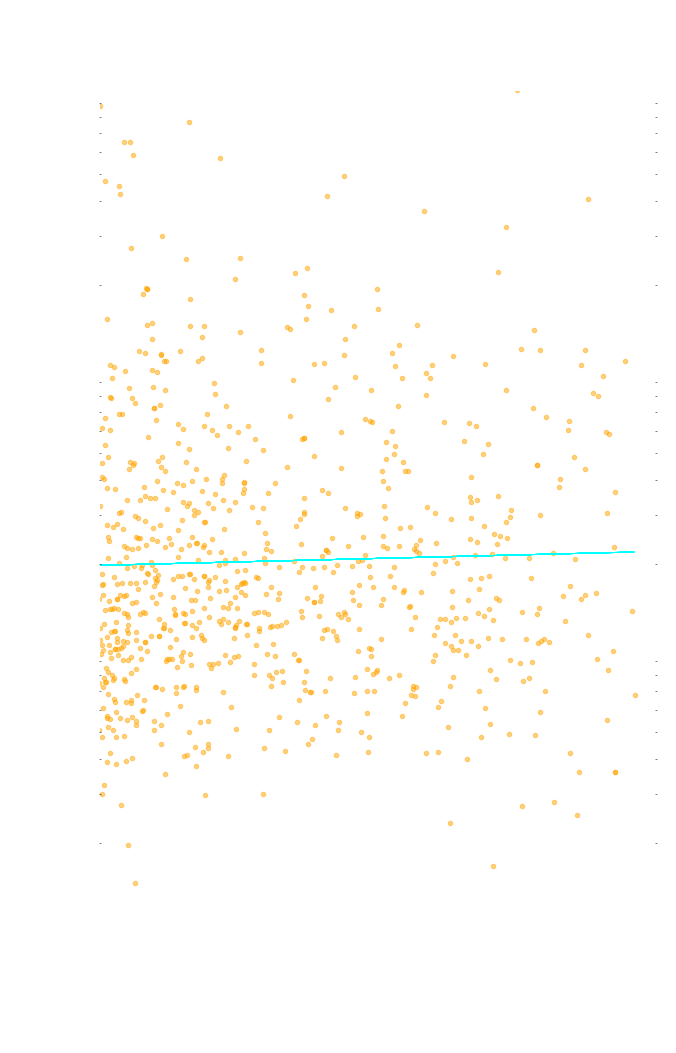

In [64]:
fl = pd.read_csv('EF_7_times2.csv', delimiter=',', header=0)
# fl = fl.ix[fl['is_ar']==0]
plt.figure(figsize=(10,15)) 
ax1 = plt.subplot(111)
plt.scatter(fl['temporal_sep_ef'], fl['adjusted_peak'], alpha=0.5, color='orange')
plt.yscale('log', basey=10)
plt.xlabel(r'$\Delta$ t EFIF Start - EF Start [s]', size = 30, color='w')
plt.ylabel(r'Flare Peak Flux [$W/m^2$]', size=30, color = 'w')
ax1.tick_params(color='w', labelcolor='w')
for spine in ax1.spines.values():
    spine.set_edgecolor('w')
slope, intercept, r, p, sigma = linregress(fl['temporal_sep_ef'], np.log10(fl['adjusted_peak']))
print linregress(fl['temporal_sep_ef'], np.log10(fl['adjusted_peak']))
# plt.xlim(0,3500)
plt.ylim(10**4, 1*10**7)
plt.xlim(0,45000)
plt.xticks(size=25, rotation=90)
plt.yticks(size=25)
y = 10**(fl['temporal_sep_ef']*slope + intercept)
plt.plot(fl['temporal_sep_ef'], y, color='cyan')
r2 = r'$r^2$'
str_m = str(slope)
str_b = str(intercept)
str_r2 = str(r*r)
deltat = r'$\Delta$ t EFIF Start - EF Start [s]'
# plt.title('Liner Regression Peak Flux vs Max B-Field:\ny = 4.99x + 0.00019\n'+r2+' = 0.07')
linregress(fl['temporal_sep_ef'], np.log10(fl['adjusted_peak']))
plt.title('log(y) = (1.11e-06)x + 5.30\n'+r2+' = '+str_r2,
         color ='w', size=40)
fNameSave = 'pres_linregnoar2.png'           
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1, transparent = True)




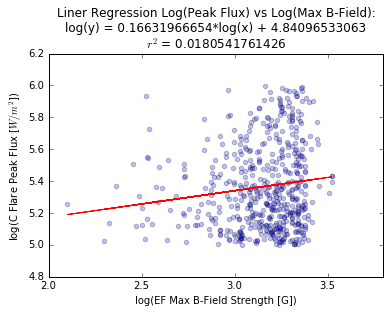

In [91]:
fl = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
fl = fl.ix[fl['adjusted_peak']>=10**5]
fl = fl.ix[fl['adjusted_peak']<=10**6]

plt.scatter(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']), alpha=0.25)
# plt.yscale('log', basey=10)
# plt.xscale('log', basex=10)
plt.xlabel('log(EF Max B-Field Strength [G])')
plt.ylabel(r'log(C Flare Peak Flux [$W/m^2$])')
slope, intercept, r, p, sigma = linregress(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']))
#plt.xlim(0,3)
# plt.ylim(10**5, 10**6)
y = (np.log10(fl['maxmagfieldstrength'])*slope + intercept)
plt.plot(np.log10(fl['maxmagfieldstrength']), y, color='red')
r2 = r'$r^2$'
str_m = str(slope)
str_b = str(intercept)
str_r2 = str(r*r)
plt.title('Liner Regression Log(Peak Flux) vs Log(Max B-Field):\nlog(y) = '+ str_m +'*log(x) + '+str_b+'\n'+r2+' = '+str_r2)
fNameSave = 'linreg_logpeakflux_C_logmaxbfield.png' 
           
# plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)

LinregressResult(slope=0.11695158292739148, intercept=5.8612202050650959, rvalue=0.099763013830112407, pvalue=0.44821151105226764, stderr=0.15316182330832581)


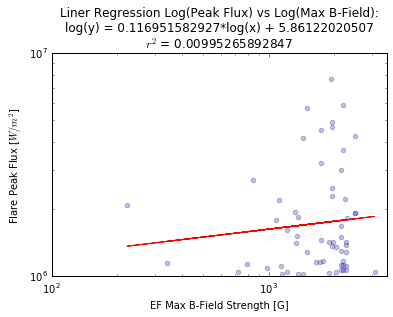

In [86]:
fl = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
fl = fl.ix[fl['adjusted_peak']>=10**6]
fl = fl.ix[fl['adjusted_peak']<=10**7]

plt.scatter(fl['maxmagfieldstrength'], fl['adjusted_peak'], alpha=0.25)
plt.yscale('log', basey=10)
plt.xscale('log', basex=10)
plt.xlabel('EF Max B-Field Strength [G]')
plt.ylabel(r'Flare Peak Flux [$W/m^2$]')
slope, intercept, r, p, sigma = linregress(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']))
plt.xlim(100,3500)
plt.ylim(10**6, 10**7)
y = 10**(np.log10(fl['maxmagfieldstrength'])*slope + intercept)
plt.plot(fl['maxmagfieldstrength'], y, color='red')
r2 = r'$r^2$'
str_m = str(slope)
str_b = str(intercept)
str_r2 = str(r*r)
plt.title('Liner Regression Log(Peak Flux) vs Log(Max B-Field):\nlog(y) = '+ str_m +'*log(x) + '+str_b+'\n'+r2+' = '+str_r2)
print linregress(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']))
fNameSave = 'linreg_logpeakflux_M_logmaxbfield.png' 
           
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)

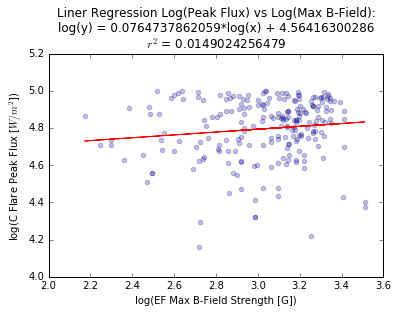

In [85]:
fl = pd.read_csv('EF100_4.csv', delimiter=',', header=0)
fl = fl.ix[fl['adjusted_peak']<=10**5]
fl = fl.ix[fl['adjusted_peak']>=10**4]

plt.scatter(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']), alpha=0.25)
# plt.yscale('log', basey=10)
# plt.xscale('log', basex=10)
plt.xlabel('log(EF Max B-Field Strength [G])')
plt.ylabel(r'log(C Flare Peak Flux [$W/m^2$])')
slope, intercept, r, p, sigma = linregress(np.log10(fl['maxmagfieldstrength']), np.log10(fl['adjusted_peak']))
#plt.xlim(0,3)
# plt.ylim(10**5, 10**6)
y = (np.log10(fl['maxmagfieldstrength'])*slope + intercept)
plt.plot(np.log10(fl['maxmagfieldstrength']), y, color='red')
r2 = r'$r^2$'
str_m = str(slope)
str_b = str(intercept)
str_r2 = str(r*r)
plt.title('Liner Regression Log(Peak Flux) vs Log(Max B-Field):\nlog(y) = '+ str_m +'*log(x) + '+str_b+'\n'+r2+' = '+str_r2)
fNameSave = 'linreg_logpeakflux_B_logmaxbfield.png' 
           
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)

In [101]:
def plt_linreg_logpeakflux(col):
    fl = pd.read_csv('EF100_4.csv', delimiter=',', header=0)

    plt.scatter(fl[col], fl['adjusted_peak'], alpha=0.25)
    plt.yscale('log', basey=10)
    plt.xlabel('EF '+col)
    plt.ylabel(r'Flare Peak Flux [$W/m^2$]')
    slope, intercept, r, p, sigma = linregress(fl[col], np.log10(fl['adjusted_peak']))
    str_m = str(slope)
    str_b = str(intercept)
    str_r2 = str(r*r)
    y = 10**(fl[col]*slope + intercept)
    plt.plot(fl[col], y, color='red')
    r2 = r'$r^2$'
    plt.title('Liner Regression Peak Flux vs '+col+':\nlog(y) = '+ str_m +'*x + '+str_b+'\n'+r2+' = '+str_r2)
    fNameSave = 'linreg_logpeakflux_+'+col+'.png' 

    plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()

In [114]:
def plt_linreg_logpeakflux_goesclass(col, goesclass):
    fl = pd.read_csv('EF100_4_'+goesclass+'.csv', delimiter=',', header=0)

    plt.scatter(fl[col], fl['adjusted_peak'], alpha=0.25)
    plt.yscale('log', basey=10)
    plt.xlabel('EF '+col)
    plt.ylabel(r'Flare Peak Flux [$W/m^2$]')
    slope, intercept, r, p, sigma = linregress(fl[col], np.log10(fl['adjusted_peak']))
    str_m = str(slope)
    str_b = str(intercept)
    str_r2 = str(r*r)
    y = 10**(fl[col]*slope + intercept)
    plt.plot(fl[col], y, color='red')
    r2 = r'$r^2$'
    plt.title('Liner Regression Peak Flux vs '+col+':\nlog(y) = '+ str_m +'*x + '+str_b+'\n'+r2+' = '+str_r2)
    fNameSave = 'linreg_logpeakflux_+'+col+'_'+goesclass+'.png' 

    plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()

In [121]:
def plt_linreg_logpeakflux_log_goesclass(col, goesclass):
    fl = pd.read_csv('EF100_4_'+goesclass+'.csv', delimiter=',', header=0)
    plt.scatter(fl[col], fl['adjusted_peak'], alpha=0.25)
    plt.yscale('log', basey=10)
    plt.xscale('log', basex=10)
    plt.xlabel('EF '+col)
    plt.ylabel(r'Flare Peak Flux [$W/m^2$]')
    slope, intercept, r, p, sigma = linregress(np.log10(fl[col]), np.log10(fl['adjusted_peak']))
    str_m = str(slope)
    str_b = str(intercept)
    str_r2 = str(r*r)
    y = 10**(np.log10(fl[col])*slope + intercept)
    plt.plot(fl[col], y, color='red')
    r2 = r'$r^2$'
    plt.title('Liner Regression Peak Flux vs '+col+':\nlog(y) = '+ str_m +'*log(x) + '+str_b+'\n'+r2+' = '+str_r2)
    fNameSave = 'linreg_logpeakflux_+'+col+'_'+goesclass+'.png' 

    plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()

In [122]:
def plt_linreg_logpeakflux_log(col):
    fl = pd.read_csv('EF100_4.csv', delimiter=',', header=0)

    plt.scatter(fl[col], fl['adjusted_peak'], alpha=0.25)
    plt.yscale('log', basey=10)
    plt.xscale('log', basex=10)
    plt.xlabel('EF '+col)
    plt.ylabel(r'Flare Peak Flux [$W/m^2$]')
    slope, intercept, r, p, sigma = linregress(np.log10(fl[col]), np.log10(fl['adjusted_peak']))
    str_m = str(slope)
    str_b = str(intercept)
    str_r2 = str(r*r)
    y = 10**(np.log10(fl[col])*slope + intercept)
    plt.plot(fl[col], y, color='red')
    r2 = r'$r^2$'
    plt.title('Liner Regression Peak Flux vs '+col+':\nlog(y) = '+ str_m +'*log(x) + '+str_b+'\n'+r2+' = '+str_r2)
    fNameSave = 'linreg_logpeakflux_+'+col+'.png' 

    plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)
    plt.show()

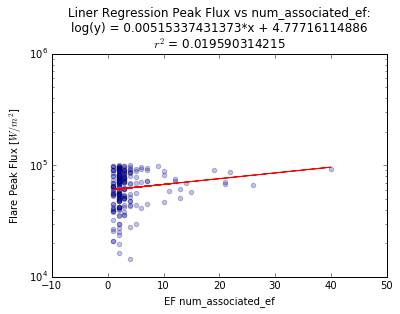

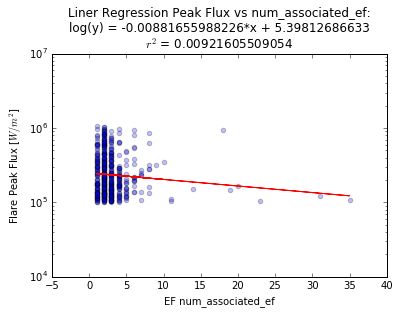

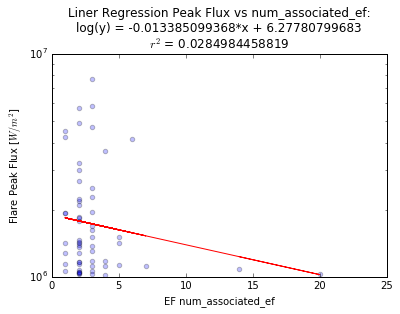

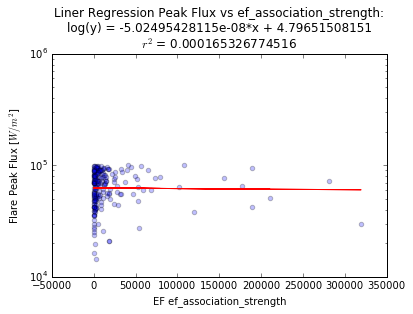

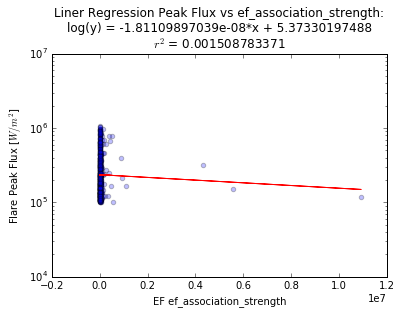

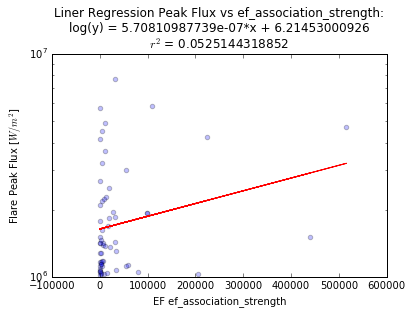

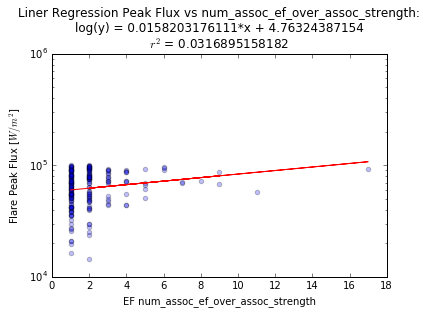

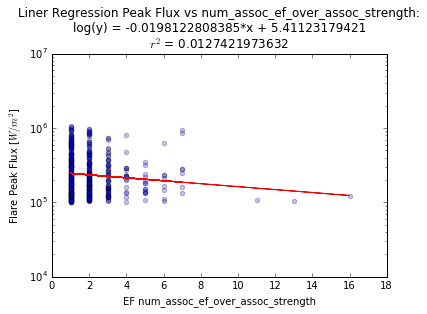

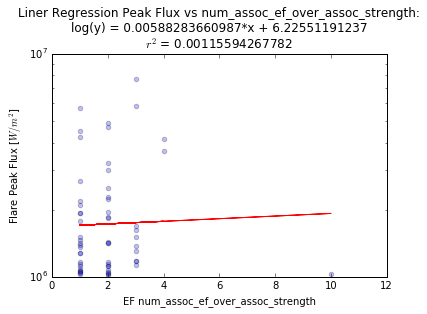

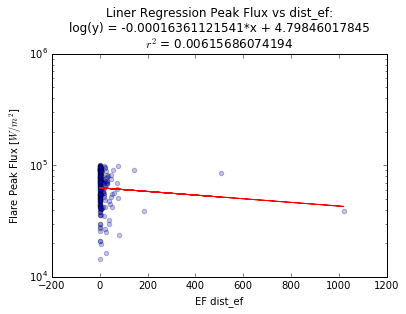

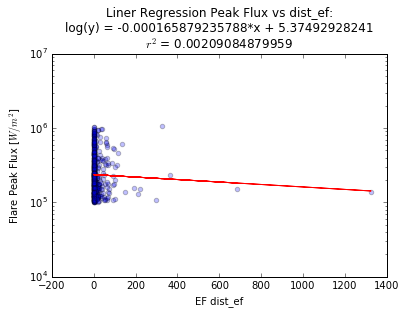

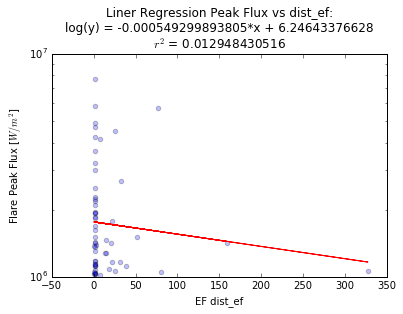

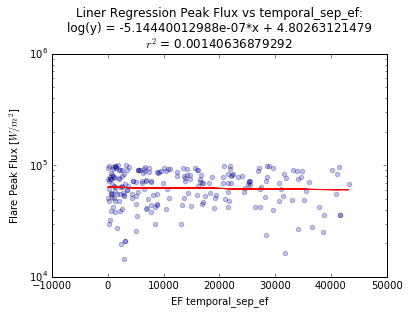

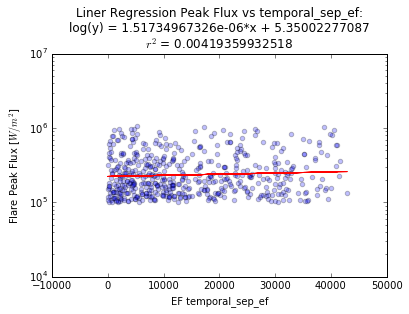

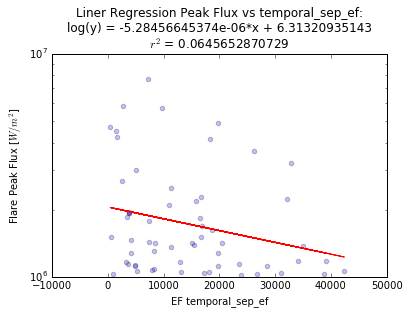

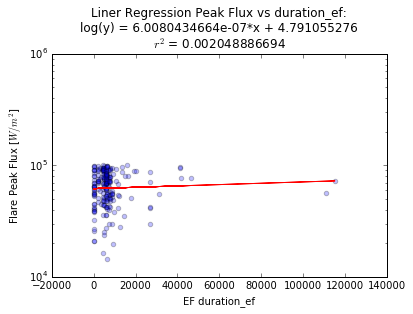

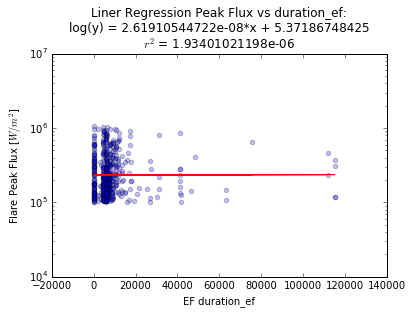

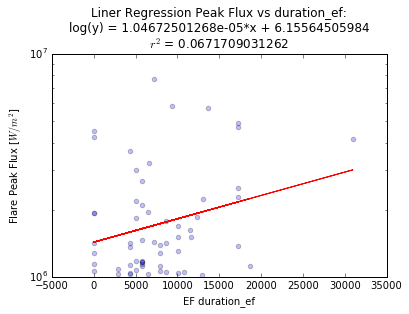

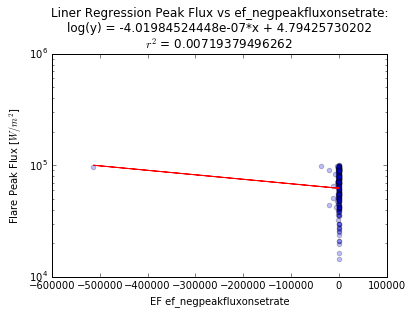

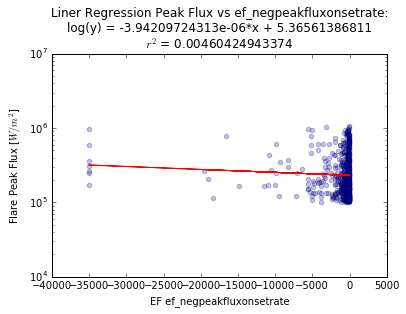

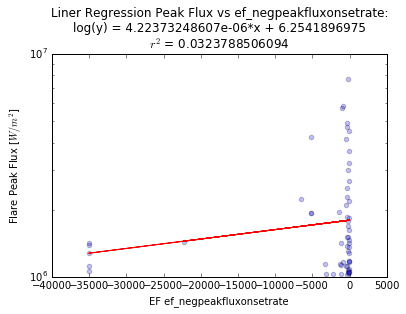

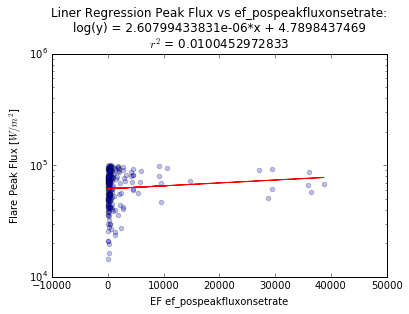

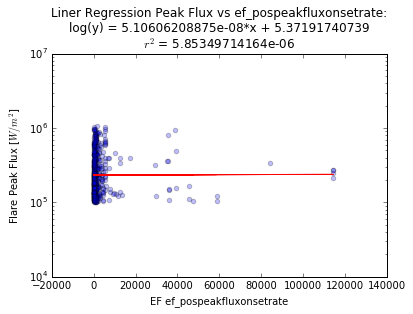

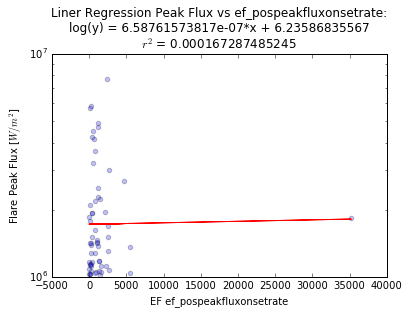

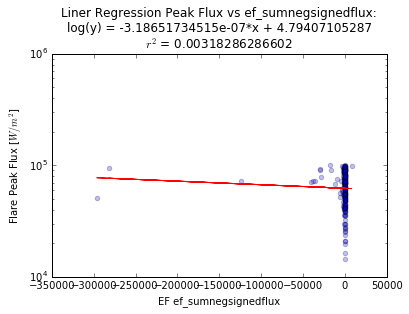

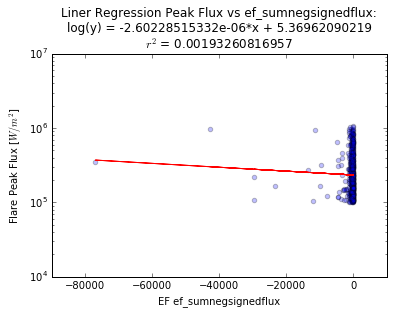

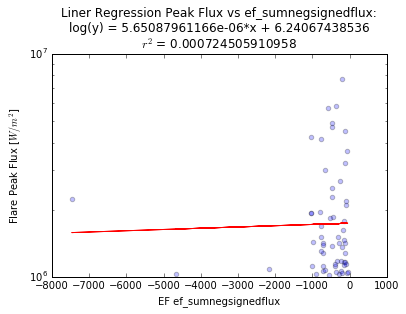

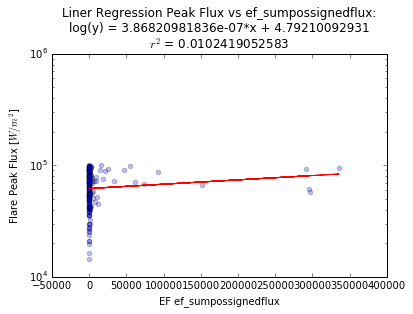

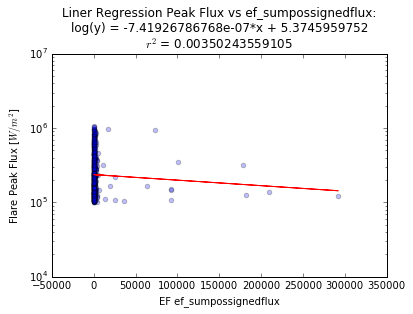

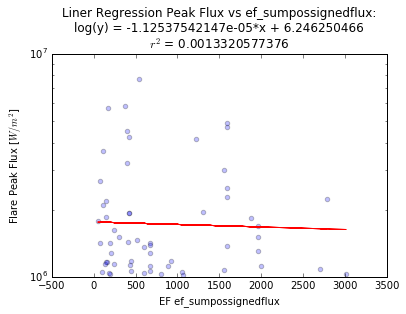

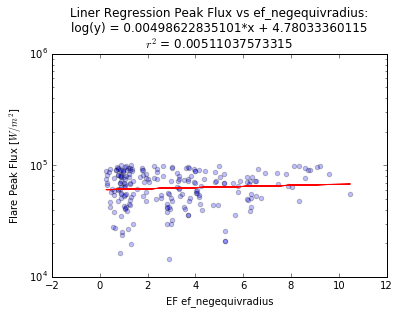

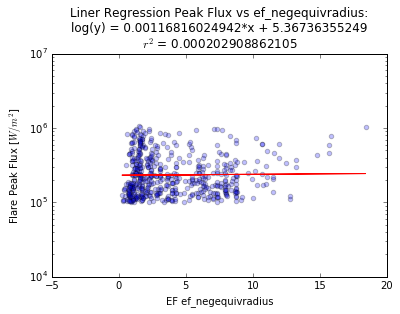

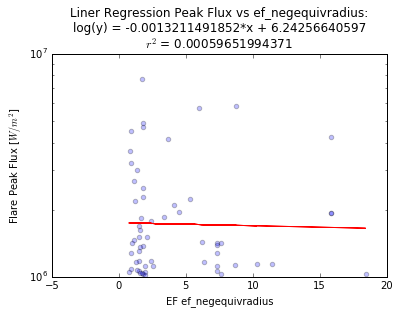

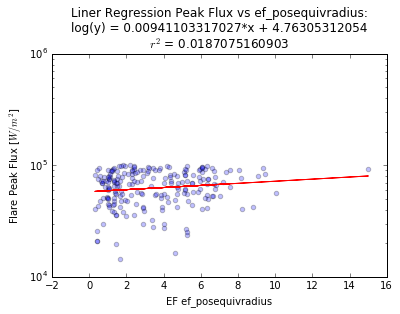

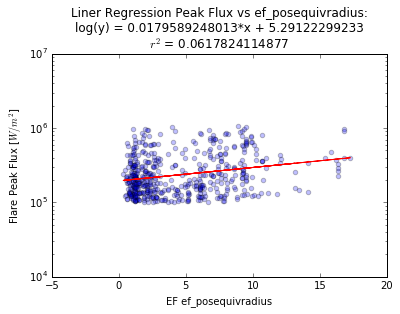

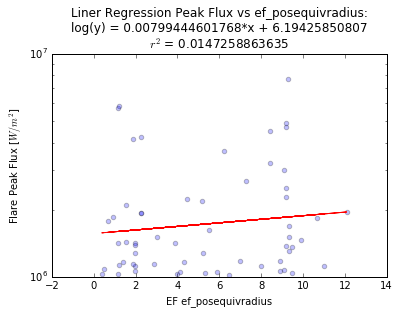

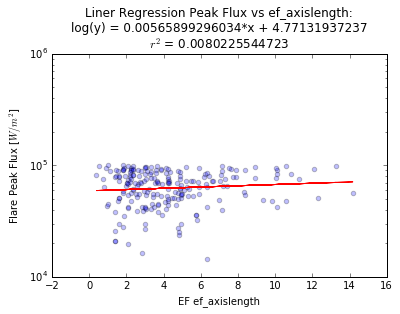

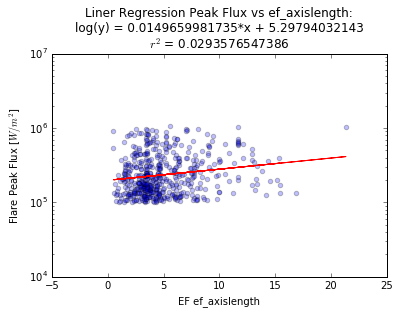

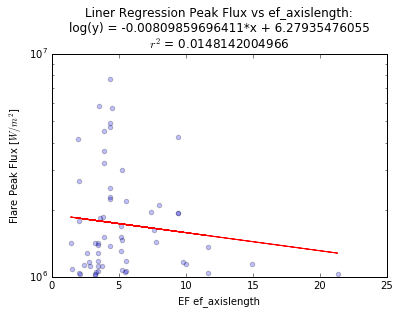

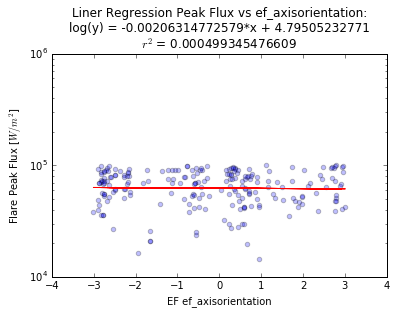

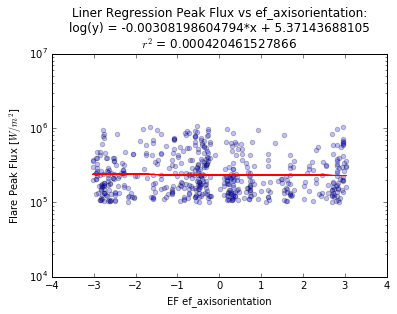

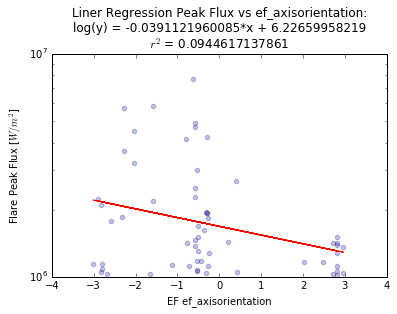

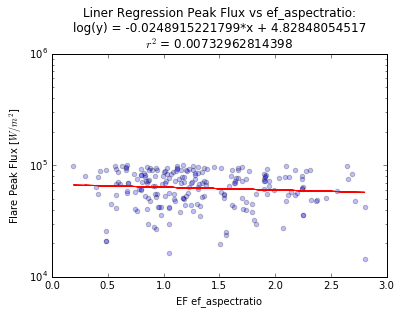

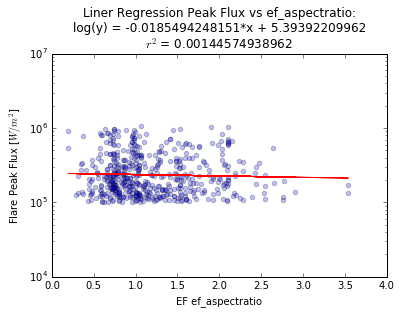

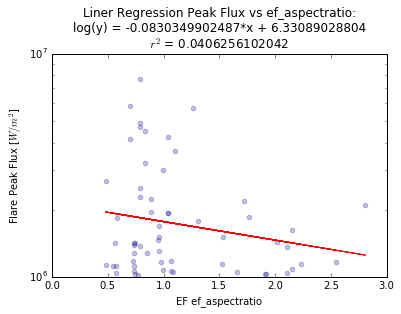

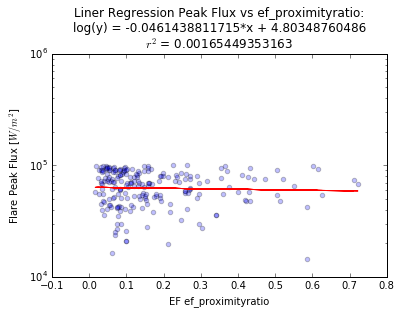

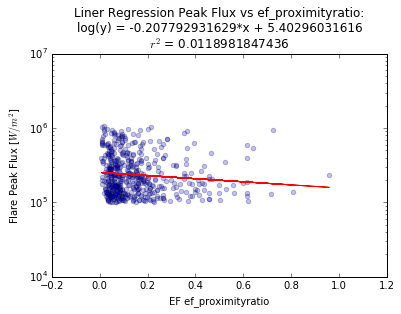

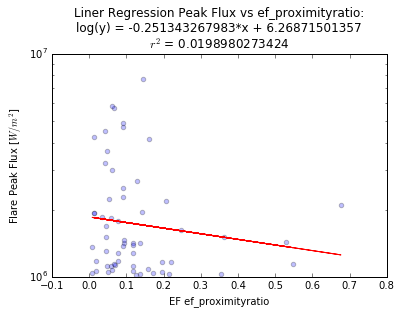

In [126]:
listOcol = ['num_associated_ef','ef_association_strength','num_assoc_ef_over_assoc_strength','dist_ef',
            'temporal_sep_ef','duration_ef','ef_negpeakfluxonsetrate','ef_pospeakfluxonsetrate',
            'ef_sumnegsignedflux','ef_sumpossignedflux','ef_negequivradius','ef_posequivradius','ef_axislength',
            'ef_axisorientation','ef_aspectratio','ef_proximityratio']
listOletters = ['B', 'C', 'M']

for column in listOcol:
    for K in listOletters:
        plt_linreg_logpeakflux_goesclass(column, K)

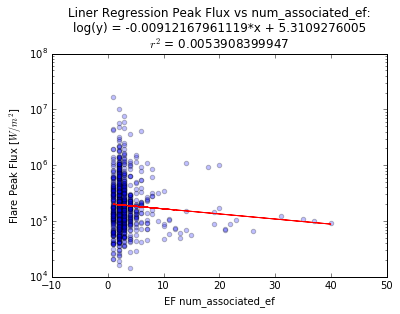

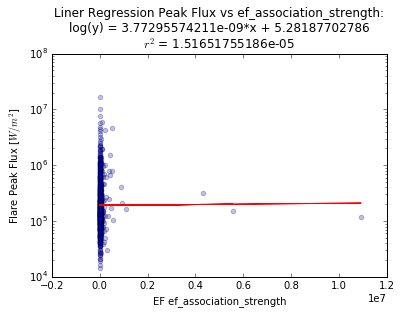

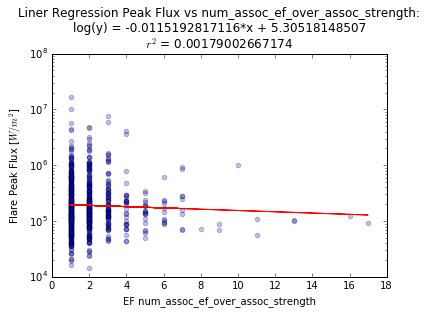

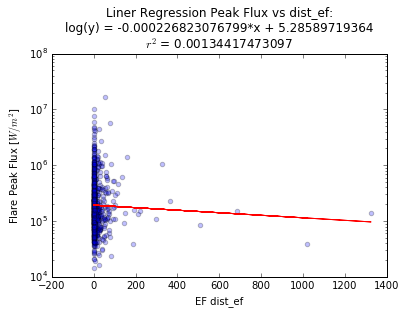

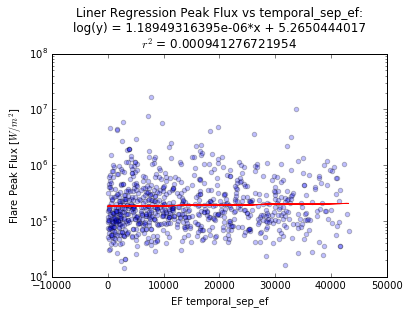

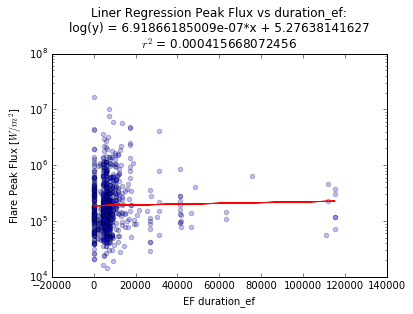

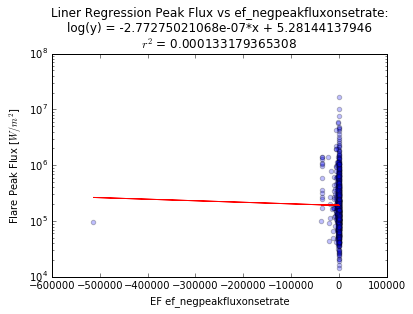

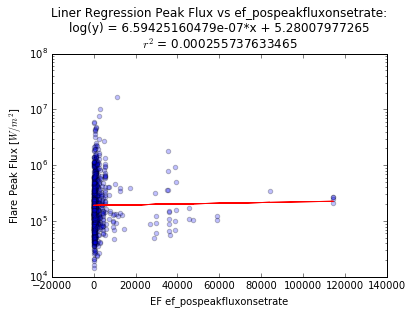

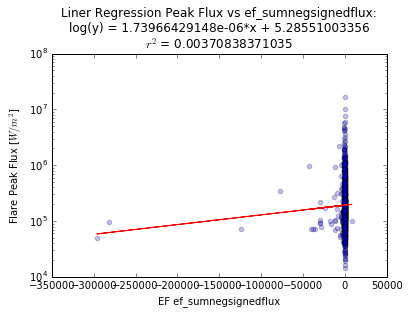

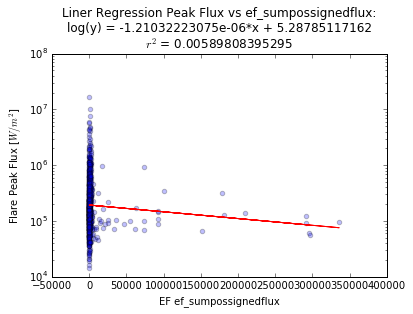

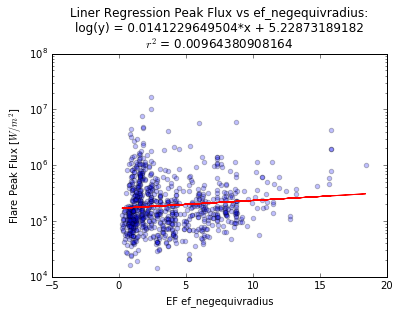

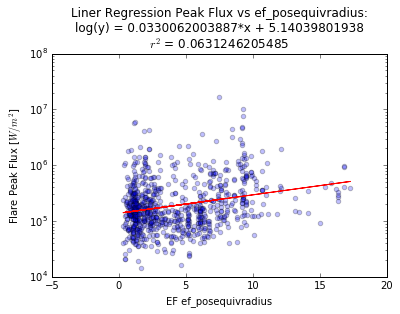

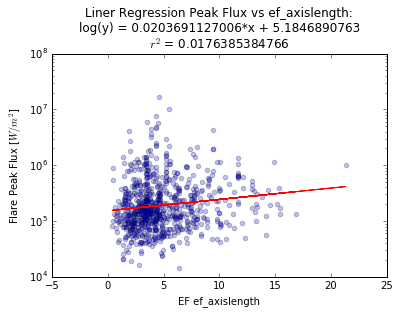

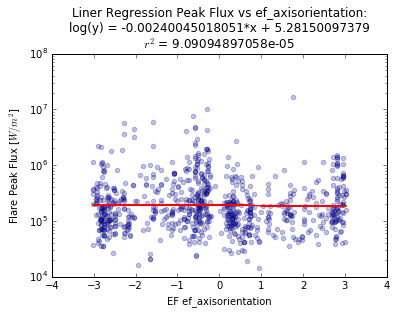

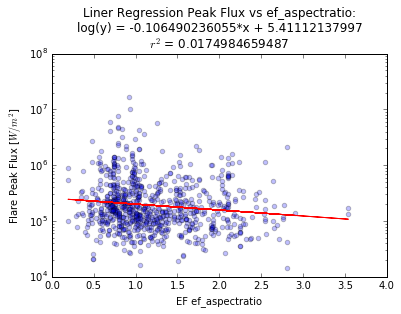

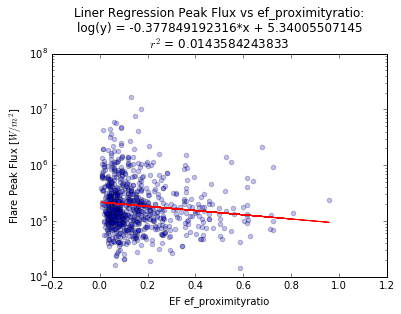

In [102]:
listOcol = ['num_associated_ef','ef_association_strength','num_assoc_ef_over_assoc_strength','dist_ef',
            'temporal_sep_ef','duration_ef','ef_negpeakfluxonsetrate','ef_pospeakfluxonsetrate',
            'ef_sumnegsignedflux','ef_sumpossignedflux','ef_negequivradius','ef_posequivradius','ef_axislength',
            'ef_axisorientation','ef_aspectratio','ef_proximityratio']

for column in listOcol:
    plt_linreg_logpeakflux(column)

In [139]:
fl = pd.read_csv('full_dataset4.csv', delimiter=',', header=0)

ef = fl.ix[fl['is_ef']==1]
print float(ef.shape[0])
print float(fl.shape[0])
print ef.shape[0]/fl.shape[0]
X = fl.ix[fl['adjusted_goesclass']=='X']
Xef = ef.ix[ef['adjusted_goesclass']=='X']
print 'X:',X.shape[0]
print 'X:',Xef.shape[0]

M = fl.ix[fl['adjusted_goesclass']=='M']
Mef = ef.ix[ef['adjusted_goesclass']=='M']
print 'M:', M.shape[0]
print 'M:',Mef.shape[0]

C = fl.ix[fl['adjusted_goesclass']=='C']
Cef = ef.ix[ef['adjusted_goesclass']=='C']
print 'C:', C.shape[0]
print 'C:',Cef.shape[0]

B = fl.ix[fl['adjusted_goesclass']=='B']
Bef = ef.ix[ef['adjusted_goesclass']=='B']
print 'B:', B.shape[0]
print 'B:',Bef.shape[0]

A = fl.ix[fl['adjusted_goesclass']=='A']
Aef = ef.ix[ef['adjusted_goesclass']=='A']
print 'A:', A.shape[0]
print 'A:',Aef.shape[0]

815.0
4139.0
0
X: 10
X: 2
M: 231
M: 58
C: 2601
C: 530
B: 1223
B: 205
A: 74
A: 20


In [132]:
print 815.0/4139

0.196907465571


In [150]:
fl = pd.read_csv('full_dataset4.csv', delimiter=',', header=0)
fl2 = pd.read_csv('noEF75_4.csv', delimiter=',', header=0)


ef = fl.ix[fl['is_ef']==1]

er = fl2.ix[fl2['is_er']==1]

eref = ef.ix[ef['is_er']==1]

print er.shape[0]
print eref.shape[0]

print float(ef.shape[0])
print float(fl2.shape[0])

X = fl.ix[fl['adjusted_goesclass']=='X']
Xef = ef.ix[ef['adjusted_goesclass']=='X']
print 'X:',X.shape[0]
print 'X:',Xef.shape[0]

M = fl.ix[fl['adjusted_goesclass']=='M']
Mef = ef.ix[ef['adjusted_goesclass']=='M']
print 'M:', M.shape[0]
print 'M:',Mef.shape[0]

C = fl.ix[fl['adjusted_goesclass']=='C']
Cef = ef.ix[ef['adjusted_goesclass']=='C']
print 'C:', C.shape[0]
print 'C:',Cef.shape[0]

B = fl.ix[fl['adjusted_goesclass']=='B']
Bef = ef.ix[ef['adjusted_goesclass']=='B']
print 'B:', B.shape[0]
print 'B:',Bef.shape[0]

A = fl.ix[fl['adjusted_goesclass']=='A']
Aef = ef.ix[ef['adjusted_goesclass']=='A']
print 'A:', A.shape[0]
print 'A:',Aef.shape[0]


261
217
815.0
1434.0
X: 10
X: 2
M: 231
M: 58
C: 2601
C: 530
B: 1223
B: 205
A: 74
A: 20


In [134]:
1351.0/4139.0

0.3264073447692679

In [151]:
(217./851)-(261./1434)

0.07298575635850513

In [4]:
import scikits.bootstrap as boot
import scipy

In [8]:
standardized_lc = pd.read_csv('standardized_lc_5_M_ef.csv', delimiter=',', header=0)

pctevent = standardized_lc.axes[1]
comp_cis = []
for pct in pctevent:
    cis = boot.ci(standardized_lc[pctevent].T, statfunction=np.median, method='pi', n_samples=1000)
    comp_cis.append(cis)

In [9]:
print comp_cis

[array([ 0.5128271 ,  0.54580907]), array([ 0.51342776,  0.54608421]), array([ 0.51391226,  0.54620464]), array([ 0.51419775,  0.54500197]), array([ 0.51437183,  0.54550549]), array([ 0.51167618,  0.54578389]), array([ 0.51400354,  0.54556979]), array([ 0.51351762,  0.54524825]), array([ 0.51360063,  0.54614594]), array([ 0.51409766,  0.54589494]), array([ 0.51335426,  0.54586693]), array([ 0.5137615 ,  0.54511545]), array([ 0.51396777,  0.54612771]), array([ 0.51219189,  0.54537112]), array([ 0.51325672,  0.54586462]), array([ 0.51377111,  0.54530244]), array([ 0.51393779,  0.54552918]), array([ 0.51384448,  0.54642668]), array([ 0.51385118,  0.54558329]), array([ 0.5130751 ,  0.54561088]), array([ 0.51430893,  0.54515922]), array([ 0.51360574,  0.54576485]), array([ 0.51283251,  0.54499835]), array([ 0.51350953,  0.54576485]), array([ 0.51364494,  0.54622814]), array([ 0.51393779,  0.54529483]), array([ 0.51268353,  0.54628809]), array([ 0.51466027,  0.54478151]), array([ 0.51425677,

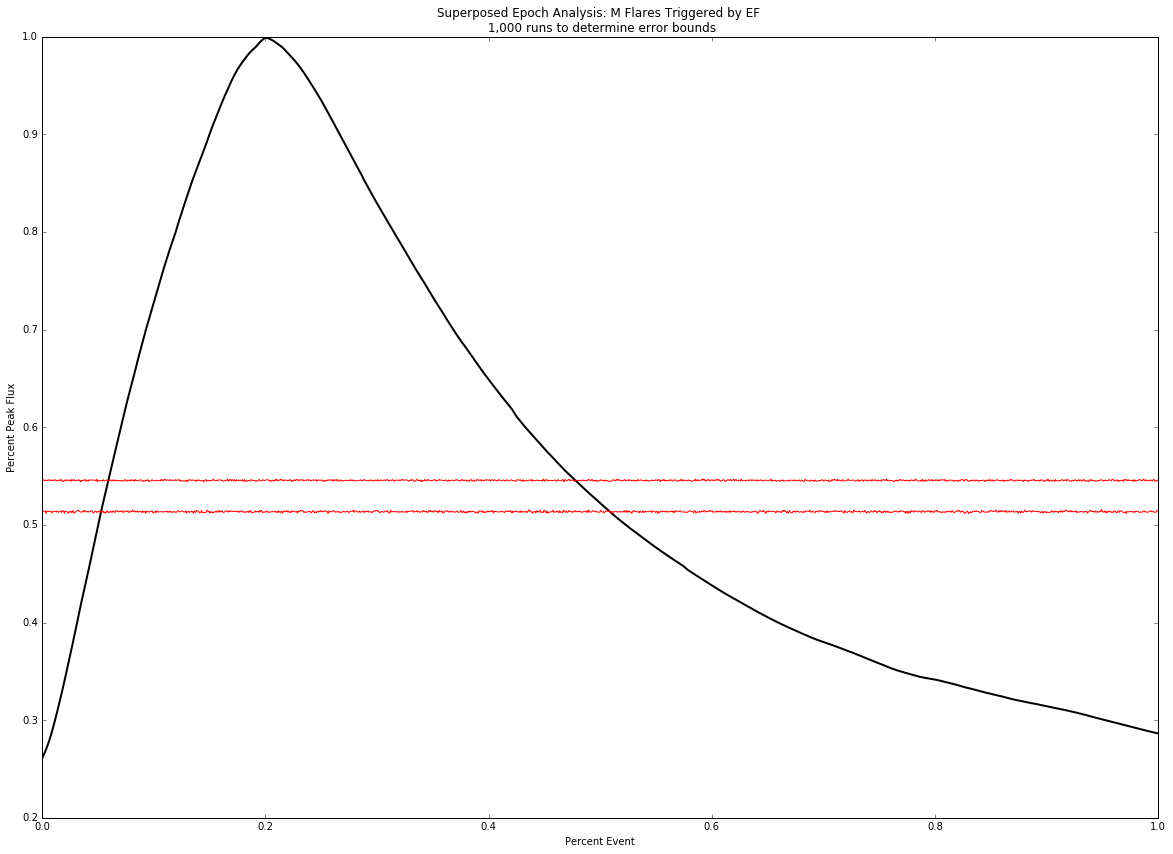

In [10]:
standardpct = np.linspace(0, 1, 1500) 
standardized_lc_noef = pd.read_csv('standardized_lc_5_M_ef.csv', delimiter=',', header=0)
pctevent = standardized_lc_noef.axes[1]
avgs = []
error_plus = []
error_minus = []
j=0
for pct in pctevent:
    avg = standardized_lc_noef[pct].mean()
    ci = comp_cis[j]
    errplus = ci[1]
    errmin = ci[0]
    avgs.append(avg)
    error_plus.append(errplus)
    error_minus.append(errmin)
    j+=1
plt.figure(figsize=(20,14))    
plt.plot(standardpct, avgs, color='black', lw=2)
plt.plot(standardpct, error_plus, color='r')
plt.plot(standardpct, error_minus, color='r')

plt.title('Superposed Epoch Analysis: M Flares Triggered by EF \n 1,000 runs to determine error bounds')
plt.xlabel('Percent Event')
_=plt.ylabel('Percent Peak Flux')
dic = {'raw_confidence_interval': comp_cis, 'average':avgs, 'upper_95': error_plus, 'lower_95':error_minus}
metadata = pd.DataFrame(dic)
metadata.to_csv('standardized_lc_5_M_ef_metadata.csv', index_label=pctevent, index=False)
fNameSave = 'SEA_5_M_ef.png' 
plt.savefig(fNameSave, bbox_inches = 'tight', pad_inches = 0.1)